# **Mini projeto - Turing Academy**
Análise de dados: Spotify

Autor: Enzo Bustos Da Silva

Agradecimento especial aos meus mentores: Camila, Mura e William

# **Informações sobre o Dataset:**

## **DataSet:**
Contém as mais diversas informações sobre cerca de 19000 músicas distribuídas entre 15 features.


## **Features:**

**song_popularity** (popularidade): Classificação das músicas pela audiência do spotify. (*Target*)

**song_duration_ms** (duração): A duração da música em milisegundos.

**acousticness** (acústica): É uma medida de confiança de 0.0 até 1.0 que mostra o quão acústica é uma faixa. Sendo 1.0 uma faixa que apresenta alta confiabilidade de ser acústica.

**danceability** (danceabilidade): Descreve o quão conveniente é dançar para esta faixa, baseado em uma combinação de elementos musicais como tempo (marcação de cada unidade de compasso, dita o ritmo), estabilidade do ritmo, força das bastidas e a regularidade de uma forma geral. Sendo 0.0 um valor para uma música pouco dançável e 1.0 é mais dançável.

**energy** (energia): É uma medição de 0.0 até 1.0 que representa uma medida de intensidade e atividade. Em termos mais comuns, uma música energética parece mais rápida, alta e barulhenta. Por exemplo, death metal é bem energético, enquanto o prelúdio de Bach pontua baixo nessa escala.

**instrumentalness** (instrumentalidade): Prevê se uma faixa tem ou não a presença de vocais. Sons como "Ooh" e "Aah" são tratados como instrumentais nesse contexto. Música rap ou palavras faladas são claramente "vocais". Quanto mais perto de 1.0 o valor de instrumentalidade, maior a probabilidade dessa faixa não conter conteúdo vocal. Valores acima de 0.5 tem a intenção de representar faixas instrumentais, porém a confiança é maior quando o valor se aproxima de 1.0.

**key** (nota musical): Uma estimativa na nota musical da faixa. Números inteiros são mapeados às notas usando a notação padrão de Classe de Notas. Por Exemplo 0 = C (Dó), 1 = C♯/D♭ (Dó sustenido/Ré bemol), 2 = D (Ré), e assim por diante. Se nenhuma nota musical for detectada, é atribuido o valor de -1.

**liveness** (ao vivo): É uma medição que detecta a presença de uma audiência na gravação. Valores mais altos indicam uma maior probabilidade da música ter sido gravada ao vivo. Um valor acima de 0.8 indica uma probabilidade bem alta da música ser ao vivo.

**loudness** (volume): O de forma geral o volume da música em debicéis (dB). Esses valores são uma média do volume ao longo de toda a faixa e são úteis para comparar o volume relativo entre outras faixas de música. O volume é a primeira qualidade de um som que é psicológicamente correlacionada com a força física (amplitude). Valores tipicamente estão entre -60 e 0 dB.

**audio_mode** (modo de áudio): Indica a modalidade (maior ou menor) de uma música, mostra o tipo da escala a qual o seu conteúdo melódico é derivada. Maior é representado por 1 e menor por 0.

**speechiness** (fala/discurso): Esse fator detecta a presença de palavras faladas dentro da musica. Quanto mais voltada para o discurso é a gravação (por exemplo: entrevistas, audiolivro, poesia), mais próximo de 1.0 vale esse atributo. Valores acima de 0.66 descrevem faixas que provavelmente são feitas apedas de discursos. Valores entre 0.33 e 0.66 descrevem faixam que provavelmente contém tanto música e fala, em seções ou camadas, incuindo casos como música rap. Valores abaixo de 0.33 são mais prováveis de representarem música e outras faixas que não são como discursos.

**tempo** (ritmo): De forma geral mostra qual o ritmo estimado da faixa em batidas por minuto (BPM). Em terminologia musical, tempo é a velocidade ou duração de cada compasso, o que deriva diretamente da média de duração da batida.

**time_signature** (Assinatura de tempo): Uma estimativa geral da assinatura de tempo de uma faixa. A assinatura de tempo (medida) é uma convenção notacional para especificar quantas batidas (pulsos) estão em cada barra (segmento de tempo dividido regularmente).

**audio_valence** (valência de áudio): Uma medida de 0.0 até 1.0 que descreve a positividade musical transmitida por uma faixa de música. As faixas com alta valência coam mais positivas (por exemplo: felizes, alegra, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo: tristes, deprimidas, zangadas).

# **Importando bibliotecas e dados**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
df = pd.read_csv('spotify.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) #Tira segunda coluna de index numérico (inútil)
df.set_index('song_name', inplace=True) #Tira index padrão do pandas e usa o nome

# **Observações iniciais:**

In [860]:
df.sort_index(inplace=True) #Deixa os indexes em ordem alfabética
df.head(15) #Mostra primeiras linhas do dataframe

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
"""40"" - Live Version 1983",1,225440,0.109kg,0.257mol/L,0.472,0.000945,8.000,0.8290000000000001,-16.259,1,0.0399,143.517,4,0.286
"""45""",48,202493,0.000696kg,0.315mol/L,0.97,0.0,8.000,0.277,-4.709,1,0.102,178.06799999999996,4,0.423
"""99""",67,199413,0.00598kg,0.552mol/L,0.804,0.0,8.000,0.111,-4.299,1,0.0303,95.98,4,0.714
"""Heroes"" - Single Version; 2014 Remastered Version",58,213813,0.016kg,0.502mol/L,0.6809999999999999,0.107,7.000,0.102,-8.263,1,0.0276,112.16,4,0.584
#CaixaGang,10,208484,0.612kg,0.6970000000000001mol/L,0.907,0.282,3.000,0.0624,-5.13,1,0.092,98.953,4,0.542
#SELFIE,27,183750,0.0136kg,0.8079999999999999mol/L,0.915,9.03e-06,0.000,0.0788,-3.277,1,0.233,127.984,4,0.647
$$$ - with Matt Ox,78,130403,0.0636kg,0.774mol/L,0.507,0.0,1.000,0.138,-6.952000000000001,0,0.065,140.067,4,0.508
$orries,62,214857,0.7609999999999999kg,0.526mol/L,0.236,0.00387,2.000,0.126,-13.59,0,0.0955,103.401,4,0.299
& Down,0,258133,0.0473kg,0.619mol/L,0.629,0.227,1.000,0.314,-4.109,0,0.33,123.003,4,0.262


In [861]:
df.sort_values('song_popularity', ascending=False, inplace=True) #Deixa as músicas em ordem de popularidade
df.head(15)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Party In The U.S.A.,nao_sei,0.8220000000000001kg,0.519mol/L,0.36,0.0,10,0.177,-8.575,0,0.105,97.42,4,0.7,nan
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329
I Love It (& Lil Pump),99,127946,0.0114kg,0.901mol/L,0.522,0.0,2.000,0.259,-8.304,1,0.33,104.053,4,0.329


In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, Party In The U.S.A. to Coupe (feat. Rich The Kid)
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  object 
 1   song_duration_ms  18835 non-null  object 
 2   acousticness      18835 non-null  object 
 3   danceability      18835 non-null  object 
 4   energy            18835 non-null  object 
 5   instrumentalness  18835 non-null  object 
 6   key               18835 non-null  float64
 7   liveness          18835 non-null  object 
 8   loudness          18835 non-null  object 
 9   audio_mode        18835 non-null  object 
 10  speechiness       18835 non-null  object 
 11  tempo             18835 non-null  object 
 12  time_signature    18835 non-null  object 
 13  audio_valence     18834 non-null  float64
dtypes: float64(2), object(12)
memory usage: 2.2+ MB


In [863]:
df.describe()

,key,audio_valence
count,18835.000,18834.000
mean,5.289,0.528
std,3.615,0.245
min,0.000,0.000
25%,2.000,0.335
50%,5.000,0.526
75%,8.000,0.725
max,11.000,0.984


# **Limpeza dos dados:**

Apenas com as primeiras impressões podemos perceber certos problemas que podem agravar uma análise plena desse DataSet, como por exemplo: linhas repetidas, valores de tempo negativo, dados faltantes, diferentes formatações, valores fora dos limites cabíveis e variáveis numéricas armazenadas como strings.


In [864]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

                              song_popularity  ... audio_valence
song_name                                      ...              
I Love It (& Lil Pump)                     99  ...         0.329
I Love It (& Lil Pump)                     99  ...         0.329
I Love It (& Lil Pump)                     99  ...         0.329
I Love It (& Lil Pump)                     99  ...         0.329
I Love It (& Lil Pump)                     99  ...         0.329
...                                       ...  ...           ...
Kamakaze                                    0  ...         0.596
Coupe (feat. Rich The Kid)                  0  ...         0.851
Jet Lag (feat. Young Scooter)               0  ...         0.493
John Madden 2                               0  ...         0.409
Coupe (feat. Rich The Kid)                  0  ...         0.851

[3905 rows x 14 columns]


Existem muitos dados repetidos, vamos tirá-los para não comprometer o nosso DataFrame

In [0]:
df.drop_duplicates(keep='first', inplace=True) #Joga fora repetições (exceto a primeira ocorrência)

Vamos trocar o 'nao_sei', por NaN (Not a Number), valor ester usado para representar um valor numérico indefinido ou irrepresentável. (é útil para tratar de dados faltantes)

In [0]:
df = df.replace(['nao_sei'], np.nan) #Troca 'nao_sei' por NaN

Vamos corrigir um pouco essa formatação

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #floats ficam com 3 casas depois da vírgula

Essas linhas de código abaixo servem para remover algumas inconsistências do DataSet, como por exemplo: as unidades estranhas, números fora da formatação e alguns números impossíveis dentro do intervalo.

In [0]:
df['acousticness']       = df['acousticness'].str.strip('kg')
df['danceability']       = df['danceability'].str.strip('mol/L')
df['song_duration_ms']   = df['song_duration_ms'].str.strip('kg')
df['acousticness']       = df['acousticness'].str.strip('mol/L')
df['key']                = df['key'].replace([0.177], np.nan)
df['audio_mode']         = df['audio_mode'].replace(['0.105'], np.nan)
df['speechiness']        = df['speechiness'].replace(['0.nao_sei'], np.nan)
df['time_signature']     = df['time_signature'].replace(['0.7', '2800000000'], np.nan)

Essa sequência abaixo serve para converter nossas colunas para o verdadeiro tipo, dado que nas primeiras impressões vimos classes numéricas e categóricas sendo tratadas da forma indevida. 

In [0]:
df['song_popularity']    = df['song_popularity'].astype('category')
df['song_duration_ms']   = df['song_duration_ms'].astype('float')
df['acousticness']       = df['acousticness'].astype('float')
df['danceability']       = df['danceability'].astype('float')
df['energy']             = df['energy'].astype('float')
df['instrumentalness']   = df['instrumentalness'].astype('float')
df['key']                = df['key'].astype('category')
df['liveness']           = df['liveness'].astype('float')
df['loudness']           = df['loudness'].astype('float')
df['audio_mode']         = df['audio_mode'].astype('category')
df['speechiness']        = df['speechiness'].astype('float')
df['tempo']              = df['tempo'].astype('float')
df['time_signature']     = df['time_signature'].astype('category')
df['audio_valence']      = df['audio_valence'].astype('float')

# **Removendo outliers**

Outliers são dados que fogem muito o escopo do nosso trabalho e senso de plausível para uma análise geral, drenamos esses dados para modelos de inteligência artificial poderem de uma forma mais geral ter uma melhor acurácia na hora de fazer predições. Outliers entram como eventos impossíveis ou muito fora de proporções para análises consistentes.

In [0]:
df.sort_index(inplace=True) #Arrumando a ordem dos indexes

In [871]:
df.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
count,14930.000,14930.000,14930.000,14929.000,14928.000,14926.000,14929.000,14929.000,14929.000,14929.000
mean,-1240833227.180,0.270,0.625,0.640,0.093,0.180,-7.678,0.106,121.097,0.527
std,151642153992.694,0.298,0.158,0.222,0.254,0.162,4.020,0.803,29.059,0.248
min,-18528908788662.000,0.000,0.000,0.000,0.000,-8.575,-38.768,0.000,0.000,0.000
25%,183932.000,0.024,0.524,0.496,0.000,0.093,-9.390,0.037,98.117,0.332
50%,211839.500,0.139,0.636,0.672,0.000,0.122,-6.751,0.054,120.016,0.527
75%,244724.500,0.458,0.740,0.818,0.005,0.224,-4.991,0.113,139.941,0.728
max,1799346.000,0.996,0.987,0.999,10.000,0.986,1.585,97.420,242.318,0.984


Podemos perceber alguns problemas ainda:
*   Tempo negativo
*   Músicas com mais de 30 minutos
*   Músicas menores de 1 minuto
*   Valores fora do range de 0.0 até 1.0

Vamos remover esses dados que não fazem o menor sentido.

In [0]:
df.loc[df['song_duration_ms'] < 0, 'song_duration_ms'] = np.nan
df.loc[df['instrumentalness'] > 1, 'instrumentalness'] = np.nan
df.loc[df['liveness'] < 0, 'liveness'] = np.nan
df.loc[df['loudness'] > 0, 'loudness'] = np.nan
df.loc[df['speechiness'] > 1, 'speechiness'] = np.nan

Para lidarmos com os outliers, vamos primeiramente abordar uma forma de identificá-los e depois vamos removê-los.

Para identificarmos podemos criar um intervalo de confiança desta forma:

*   Limite_inferior = média_coluna - 2.7 * (desvio_padrao_coluna)
*   Limite_superior = média_coluna + 2.7 * (desvio_padrao_coluna)

Obs.: Vou fazer isso com todas as nossas variáveis numéricas

Isso fará com que foquemos apenas em dados entre o Limite_inferior e Limite_superior e, valores fora deste intervalo serão tratados como NaN.

A teoria por trás disso pode ser visualizada nessa figura da Wikipedia sobre distribuição normal: [imagem](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal#/media/Ficheiro:Boxplot_vs_PDF.svg)

In [0]:
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

In [0]:
float_cols = ['song_duration_ms', 'acousticness', 'danceability',
              'energy', 'instrumentalness', 'liveness', 
              'loudness', 'speechiness', 'tempo','audio_valence']

In [0]:
for col in float_cols:
  exclui_outliers(df, col)

# Trabalhando com valores faltantes

Por mais que dê muita vontade de retirar todos os dados faltantes, fazer isso acarretaria na perda de cerca de 2300 linhas, o que para um DataSet de aproximadamente 15000 entradas (já excluindo as repetidas) é um pouco alto demais (~15% dos dados).

Portanto vamos tentar analisar um pouco os nossos dados para saber o que fazer com os dados faltantes em cada caso.

In [0]:
#df.dropna(inplace=True) #Remove NaN's
#não vamos utilizar você hoje

Vamos dar mais uma avaliada no DataSet até o momento e plotar alguns gráficos para vermos o que está acontecendo.

In [0]:
sns.set(style="ticks")

In [878]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14930 entries, "40" - Live Version 1983 to 피 땀 눈물
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   song_popularity   14929 non-null  category
 1   song_duration_ms  14681 non-null  float64 
 2   acousticness      14930 non-null  float64 
 3   danceability      14824 non-null  float64 
 4   energy            14805 non-null  float64 
 5   instrumentalness  13926 non-null  float64 
 6   key               14929 non-null  category
 7   liveness          14420 non-null  float64 
 8   loudness          14583 non-null  float64 
 9   audio_mode        14928 non-null  category
 10  speechiness       14485 non-null  float64 
 11  tempo             14814 non-null  float64 
 12  time_signature    14927 non-null  category
 13  audio_valence     14929 non-null  float64 
dtypes: category(4), float64(10)
memory usage: 1.3+ MB


Podemos perceber que existem, poucos dados faltantes nas maioria das colunas, mas vamos olhar um pouco mais de perto.

In [879]:
df.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
count,14681.000,14930.000,14824.000,14805.000,13926.000,14420.000,14583.000,14485.000,14814.000,14929.000
mean,214852.429,0.270,0.628,0.645,0.036,0.162,-7.319,0.088,120.491,0.527
std,49794.983,0.298,0.153,0.215,0.120,0.106,3.217,0.080,28.193,0.248
min,53066.000,0.000,0.198,0.041,0.000,0.011,-18.515,0.000,46.591,0.000
25%,183453.000,0.024,0.527,0.500,0.000,0.092,-9.151,0.037,98.040,0.332
50%,211193.000,0.139,0.637,0.674,0.000,0.119,-6.663,0.053,120.002,0.527
75%,242333.000,0.458,0.741,0.819,0.001,0.205,-4.957,0.103,139.512,0.728
max,386946.000,0.996,0.987,0.999,0.741,0.572,0.000,0.378,199.402,0.984


Podemos notar algumas coisas estranhas em acousticness, instrumentalness, liveness e speechiness. Principalmente no fato das distribuições destas variáveis.



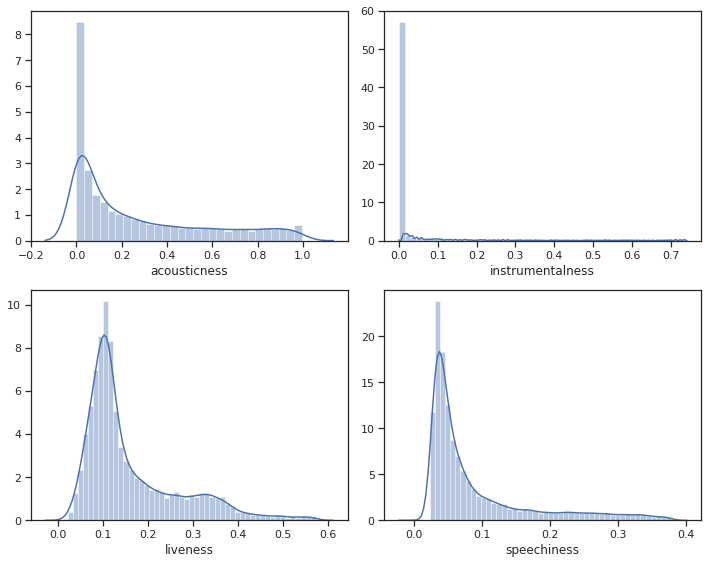

In [880]:
plt.figure(figsize=(10,8))
cols = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']
for i in range(len(cols)):
  plt.subplot(2, 2, i+1)
  sns.distplot(df[cols[i]])
plt.tight_layout()
plt.show()

Podemos perceber algumas coisas interessantes, realmente elas tem uma distribuição estranha e mais concentrada no começo dos dados, mas especificamente para intrumentalness quase não existem valores que sejam muito longe de 0. Ou seja, essa coluna está mais atrapalhando do que ajudando, uma vez que são muito poucas as ocorrências de valores fora diferentes de 0, para comparar se isso tem ou não impacto direto com a popularidade da música.

Dito isso:

In [0]:
df.drop('instrumentalness', axis = 1, inplace=True)

Certo, tendo em vista a distribuição dessas colunas plotadas, vamos tratar os nossos dados faltantes dessas colunas seguindo a tendência "deslocada" desse gráfico e colocar valores faltantes como membros da moda.

In [0]:
for column in ['acousticness', 'liveness', 'speechiness']:
    df[column].fillna(df[column].mode()[0], inplace=True)

Vamos agora dar uma olhada nas nossas outras variáveis numéricas e ver como podemos tratar os dados faltantes.

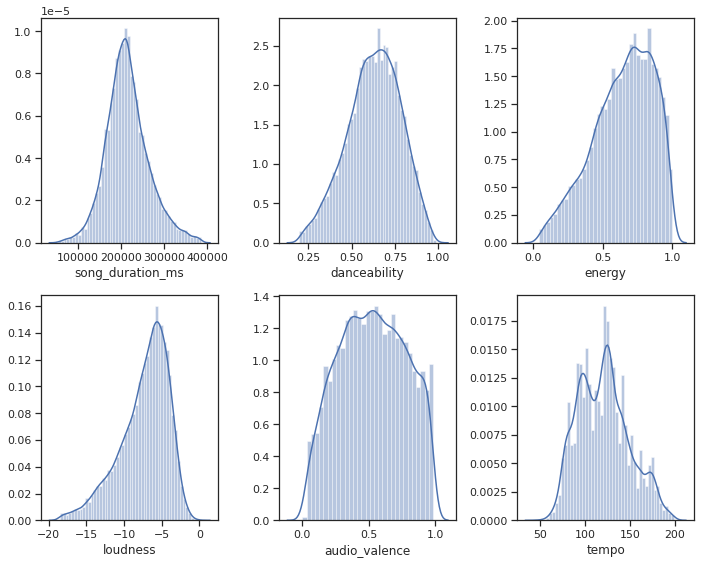

In [883]:
plt.figure(figsize=(10,8))
cols = ['song_duration_ms',  'danceability', 'energy', 
                'loudness', 'audio_valence', 'tempo']
for i in range(len(cols)):
  plt.subplot(2, 3, i+1)
  sns.distplot(df[cols[i]])
plt.tight_layout()
plt.show()

Como essas outras variáveis apresentam uma distribuição mais equilibrada dos seus dados, vou distribuir os dados faltantes como membros da média.

Como 'tempo' apresenta um comportamento estranho com dois picos, vou deixar para tratá-lo depois de analisar as variáveis categóricas.

In [0]:
for column in ['song_duration_ms',  'danceability', 'energy', 
                'loudness'       , 'audio_valence']:
    df[column].fillna(df[column].mean(), inplace=True)

Agora vamos olhar as nossas variáveis categóricas.

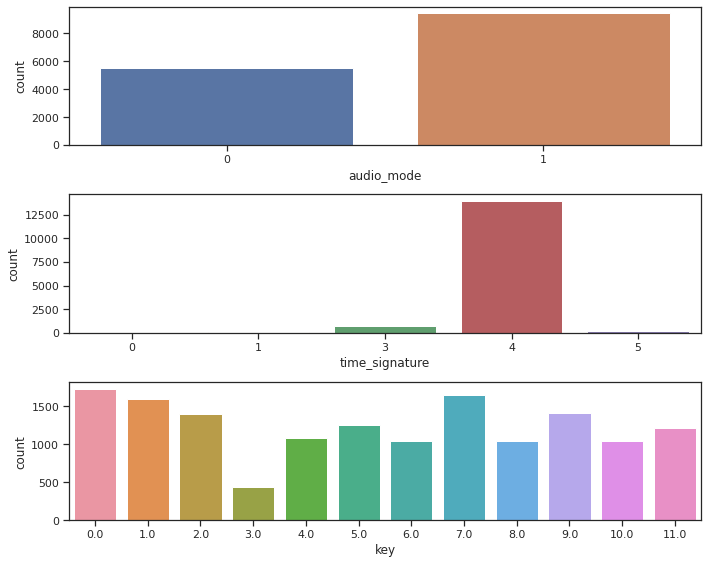

In [885]:
plt.figure(figsize=(10,8))
cols = ['audio_mode', 'time_signature', 'key']
for i in range(len(cols)):
  plt.subplot(3, 1, i+1)
  sns.countplot(df[cols[i]])
plt.tight_layout()
plt.show()

Da mesma forma que em 'instrumentalness', a variável time_signature é extremamente deslocada para valores do tipo 4, ou seja, não utilizaremos essa coluna para nossa análise.

Dessa forma:

In [0]:
df.drop('time_signature', axis = 1, inplace=True)

Vamos dar mais uma olhada nos nossos dados, para ver como eles se encontram.

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14930 entries, "40" - Live Version 1983 to 피 땀 눈물
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   song_popularity   14929 non-null  category
 1   song_duration_ms  14930 non-null  float64 
 2   acousticness      14930 non-null  float64 
 3   danceability      14930 non-null  float64 
 4   energy            14930 non-null  float64 
 5   key               14929 non-null  category
 6   liveness          14930 non-null  float64 
 7   loudness          14930 non-null  float64 
 8   audio_mode        14928 non-null  category
 9   speechiness       14930 non-null  float64 
 10  tempo             14814 non-null  float64 
 11  audio_valence     14930 non-null  float64 
dtypes: category(3), float64(9)
memory usage: 1.8+ MB


Ótimo, a maior parte do trabalho está feita.

Vamos tratar agora da nossa variável 'tempo', ela apresentava uma comportamento um tanto irregular, então vou só excluir as linhas faltantes, uma vez que nesse caso estaríamos deletando cerca de 120 linhas (~0.7% dos dados [muito mais aceitável]).

In [0]:
df.dropna(subset=['tempo'], inplace=True) #tiro valores NaN de 'tempo'
df.dropna(inplace=True) #removo demais linhas com dados faltantes
#Acabamos por usar realmente esse comando, mas de uma forma
#muito mais consiente do que se tivéssemos usado lá em cima

Com isso nossos dados agora estão limpos de uma forma eficiente, vamos para o que interessa: as relações entre nossas features e quais características geram uma música com alta popularidade

# Análise do target

Como eu optei por tratar a coluna target ('song_popularity') como uma variável categórica vamos fazer um processo de clusterização.

Obs.: Clustering é um conjunto de técnicas de agrupamento de dados com base em sua semelhança.

Dessa forma, podemos trabalhar com nossos dados de uma forma mais geral, ao invés de cada popularidade ter uma categoria correnpondente, podemos agrupar um conjunto de popularidades com mesmas características em um cluster.

In [0]:
from sklearn.cluster import KMeans

In [0]:
clustering = KMeans(n_clusters=5) #define o número de grupos que eu quero, nesse caso, 5
df['song_popularity_cluster'] = clustering.fit_predict(df['song_popularity'].astype(int).values.reshape(-1, 1))
df['song_popularity'] = df['song_popularity'].astype(int)

Essa primeira parte serve para adicionarmos uma coluna 'song_popularity_cluster' que é nossa classificação já clusterizada, agora vamos analisar umas tabelas, da relação da popularidade com as variáveis numéricas.

**Clusterização:**

Primeiramente gostaria de mostrar esse gráfico da distribuição da popularidade, pois ele ~é muito lindo~ é bom para visualizarmos a distribuição, com ele conseguimos perceber que ter uma popularidade próxima de 100 é algo melhor, uma vez que menos músicas conseguem ter uma alta popularidade.

Isso é mais para não acontecer confusão em relação à outra métrica de músicas, o ranking. Neste geralmente ter um menor número significa uma melhor classificação (famoso top 1 ou top 10 que escutamos).

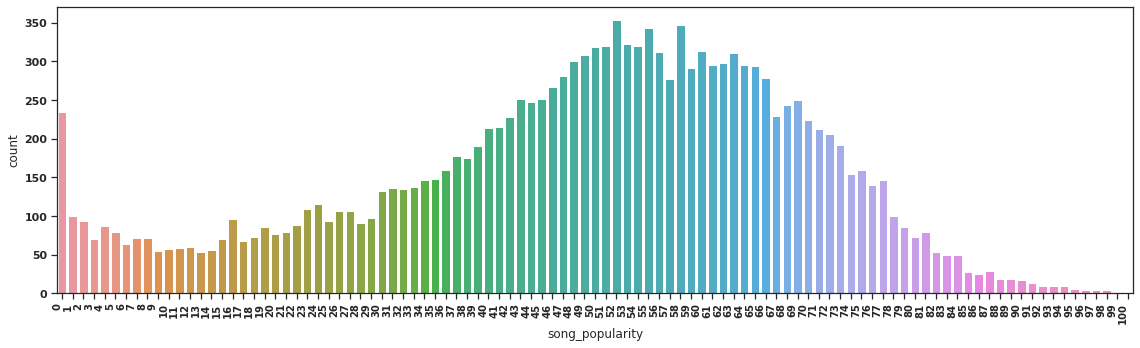

In [891]:
plt.figure(figsize=(16,5))
sns.countplot(x='song_popularity', data=df)
plt.xticks(rotation=90, horizontalalignment='right', fontweight='bold', fontsize='small')
plt.yticks(fontweight='bold', horizontalalignment='right')
plt.tight_layout()
plt.show()

Agora vamos para as tabelas, primeiro vamos ver as relações com as variáveis numéricas e depois com as categóricas.

In [892]:
df[['song_popularity','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

song_popularity               ...                      
                                  count   mean   std  ...    50%    75%     max
song_popularity_cluster                               ...                      
0                              4098.000 45.435 4.527  ... 46.000 49.000  52.000
1                              2620.000 74.878 5.985  ... 73.000 78.000 100.000
2                              1449.000  7.170 5.682  ...  6.000 12.000  17.000
3                              4527.000 59.731 4.265  ... 60.000 63.000  67.000
4                              2119.000 28.172 5.426  ... 29.000 33.000  36.000

[5 rows x 8 columns]

Essa primeira tabela é justamente para analisarmos onde foi feito esse corte, eu decidi trabalhar com 5 clusters. Segundo a análise de proximidade do KMeans, esses dados foram divididos dessa forma:

0.   Popularidade entre: 37 e 52.....(médias)
1.   Popularidade entre: 67 e 100...(melhores)
2.   Popularidade entre:  0 e 17.......(piores)
3.   Popularidade entre: 53 e 67.....(médias-altas)
4.   Popularidade entre: 18 e 37.....(médias-baixas)


**Duração:**

In [893]:
df[['song_duration_ms','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

song_duration_ms             ...                      
                                   count       mean  ...        75%        max
song_popularity_cluster                              ...                      
0                               4098.000 211752.208  ... 239516.250 386026.000
1                               2620.000 219732.798  ... 243843.000 386906.000
2                               1449.000 218187.203  ... 245195.000 384850.000
3                               4527.000 215479.882  ... 242380.000 386373.000
4                               2119.000 211759.185  ... 238266.500 386946.000

[5 rows x 8 columns]

Percebemos aqui que a duração não tem muita relação com a popularidade da música, observe que entre as piores (2) e melhores (1) não há uma diferença significativa de tempo para tirarmos alguma conclusão útil.

**Acústica:**

In [894]:
df[['acousticness','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

acousticness                                          
                               count  mean   std   min   25%   50%   75%   max
song_popularity_cluster                                                       
0                           4098.000 0.288 0.304 0.000 0.026 0.159 0.512 0.996
1                           2620.000 0.219 0.254 0.000 0.028 0.114 0.318 0.995
2                           1449.000 0.228 0.287 0.000 0.009 0.083 0.372 0.996
3                           4527.000 0.277 0.307 0.000 0.022 0.142 0.463 0.996
4                           2119.000 0.310 0.313 0.000 0.030 0.191 0.571 0.995

A acústica também não parece influenciar muito no nosso problema, podemos perceber que as músicas gostam de estar entre uma faixa de 0.2 e 0.3 de acústica (olhando a média de todas), mas se olharmos o minínimo e máximo, todas variam de 0 até algo muito próximo de 1. De qualquer forma, as melhores apresentam uma acústica um pouco menor que as outras na média.

**Danceabilidade:**

In [895]:
df[['danceability','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

danceability                                          
                               count  mean   std   min   25%   50%   75%   max
song_popularity_cluster                                                       
0                           4098.000 0.629 0.155 0.199 0.529 0.639 0.741 0.981
1                           2620.000 0.649 0.147 0.202 0.555 0.658 0.754 0.978
2                           1449.000 0.611 0.156 0.208 0.507 0.616 0.723 0.970
3                           4527.000 0.623 0.152 0.199 0.520 0.628 0.736 0.980
4                           2119.000 0.628 0.150 0.198 0.532 0.634 0.740 0.987

Eu confesso que fiquei um pouco surpreso, achei que danceabilidade fosse algo que tivesse uma influência maior sobre o quanto uma música é ou não popular, mas pelo que vemos isso não é algo muito constante, até aparenta existir uma certa crescente, mas é algo muito leve para podermos deter como algo impactante. 

O máximo que podemos concluir é que músicas mais populares tendem a ter uma danceabilidade levemente maior, mas isso não parece ser um fator marcante, pois as médias-altas (3) tem um valor médio abaixo que a das médias-baixas (4), o que quebra essa linha de pensamento. De qualquer forma, as melhores apresentam danceabilidade levemente maiores que as outras na média.

**Energia:**

In [896]:
df[['energy','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

energy                                          
                           count  mean   std   min   25%   50%   75%   max
song_popularity_cluster                                                   
0                       4098.000 0.633 0.221 0.041 0.485 0.654 0.811 0.996
1                       2620.000 0.659 0.190 0.043 0.538 0.683 0.807 0.997
2                       1449.000 0.679 0.210 0.067 0.534 0.711 0.851 0.996
3                       4527.000 0.643 0.220 0.041 0.501 0.673 0.820 0.997
4                       2119.000 0.634 0.216 0.043 0.479 0.661 0.810 0.999

Uma linha de pensamento de que músicas mais populares também são mais energéticas até que começa a nascer quando, vemos as melhores no topo tendo uma apresentação decrescente até chegar nas piores. De qualquer forma, as piores apresentam um valor de energia mais alto na média.

**Fator ao vivo:**

In [899]:
df[['liveness','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

liveness                                          
                           count  mean   std   min   25%   50%   75%   max
song_popularity_cluster                                                   
0                       4098.000 0.164 0.108 0.015 0.094 0.117 0.205 0.572
1                       2620.000 0.156 0.102 0.021 0.091 0.115 0.189 0.571
2                       1449.000 0.165 0.107 0.021 0.093 0.119 0.216 0.569
3                       4527.000 0.156 0.102 0.020 0.093 0.114 0.190 0.572
4                       2119.000 0.164 0.102 0.011 0.095 0.122 0.214 0.568

Mesmo que o fator ao vivo não seja algo muito impactante para nosso target, podemos ver um padrão interessante, a maioria das músicas converge quanto a lançar músicas que não tem uma plateia ou algo do tipo, o que de fato é esperado. E podemos checar isso com os valores máximos sendo ainda menores que 0.6 para qualquer caso.

Interessante notar que as melhores músicas (1 e 3) ficam na faixa de 0.156, enquanto as piores (0, 2 e 4) tendem a ficar na faixa de 0.164 o que é curioso, pois mesmo existindo uma preferência geral por faixas gravadas sem uma platéia, as músicas com piores popularidades tendem a ter uma tolerância a mais por músicas gravadas com plateia, que talvez agrave sua popularidade.

**Sonoridade:**

In [900]:
df[['loudness','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

loudness               ...                     
                           count   mean   std  ...    50%    75%    max
song_popularity_cluster                        ...                     
0                       4098.000 -7.652 3.296  ... -7.086 -5.228 -0.790
1                       2620.000 -6.558 2.736  ... -6.013 -4.640 -0.739
2                       1449.000 -7.150 3.111  ... -6.698 -4.930 -0.757
3                       4527.000 -7.257 3.170  ... -6.719 -4.970 -0.257
4                       2119.000 -7.867 3.323  ... -7.319 -5.416 -0.398

[5 rows x 8 columns]

Mesmo não podendo obervar nenhuma tendência ou relação clara entre popularidade e sonoridade, percebemos que as mais populares apresentam músicas levemente mais altas, isso por conta no salto da média e também pelo desvio padrão significamente menor que o das outras, o que indica maior concentração em torno da média.

**Discurso:**

In [901]:
df[['speechiness','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

speechiness                                          
                              count  mean   std   min   25%   50%   75%   max
song_popularity_cluster                                                      
0                          4098.000 0.087 0.079 0.023 0.036 0.052 0.102 0.377
1                          2620.000 0.091 0.082 0.022 0.037 0.054 0.111 0.378
2                          1449.000 0.085 0.077 0.024 0.036 0.052 0.097 0.378
3                          4527.000 0.083 0.076 0.023 0.035 0.049 0.091 0.378
4                          2119.000 0.087 0.081 0.023 0.035 0.051 0.101 0.375

Como o esperado nn existe muita variação nessa métrica, pois estamos trabalhando com músicas e não muito com discursos ou algo do gênero.

**Ritmo:**

In [902]:
df[['tempo','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

tempo                 ...                        
                           count    mean    std  ...     50%     75%     max
song_popularity_cluster                          ...                        
0                       4098.000 120.437 28.775  ... 119.997 139.928 199.402
1                       2620.000 120.127 27.638  ... 118.941 138.193 199.373
2                       1449.000 122.454 27.702  ... 122.311 140.024 198.870
3                       4527.000 119.827 28.234  ... 119.990 137.395 198.670
4                       2119.000 121.111 27.941  ... 120.031 139.889 198.372

[5 rows x 8 columns]

Não parece haver uma relação muito clara entre o ritmo e popularidade, o que é esperado, pois diferentes estilos musicais tem seu ritmo próprio. Os valores para as 5 categorias são distribuídos de forma muito parecida, é legal notar apenas essa faixa entre 45 e 200 BPM que as músicas estão, em sua maioria, contidas.

**Valência:**

In [903]:
df[['audio_valence','song_popularity_cluster']].groupby('song_popularity_cluster').describe()

audio_valence                                          
                                count  mean   std   min   25%   50%   75%   max
song_popularity_cluster                                                        
0                            4098.000 0.527 0.257 0.023 0.325 0.532 0.740 0.982
1                            2620.000 0.524 0.233 0.035 0.341 0.522 0.708 0.980
2                            1449.000 0.534 0.244 0.037 0.337 0.532 0.736 0.978
3                            4527.000 0.509 0.246 0.028 0.316 0.505 0.699 0.984
4                            2119.000 0.561 0.249 0.033 0.369 0.572 0.769 0.981

Valência de áudio não parece ser algo muito discrepante para podermos fazer uma conclusão.

**Nota musical:**

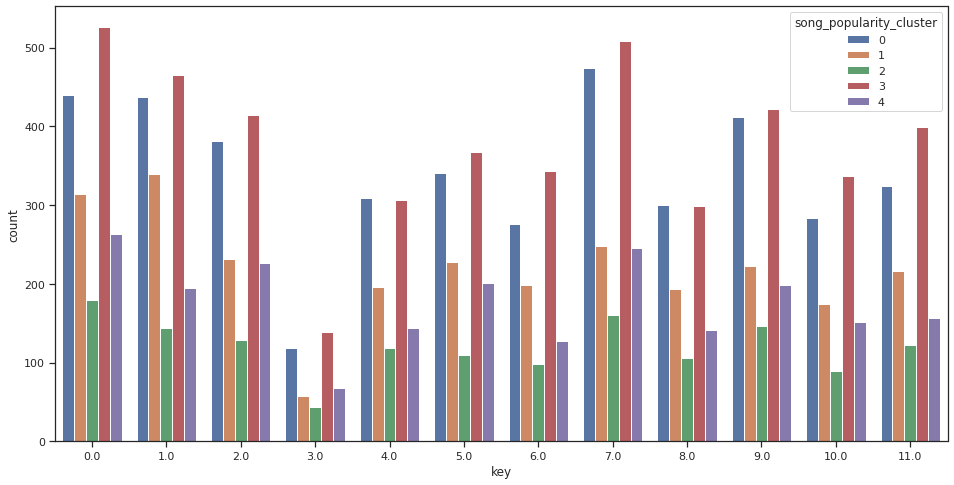

In [908]:
plt.figure(figsize=(16,8))
sns.countplot(x='key', data=df, hue='song_popularity_cluster')

Parece que a nota musical predominante não é um fator que afete a popularidade diretamente, vemos que o desenho das barras basicamente se repete ao longo das diferentes notas.

**Modo de áudio:**

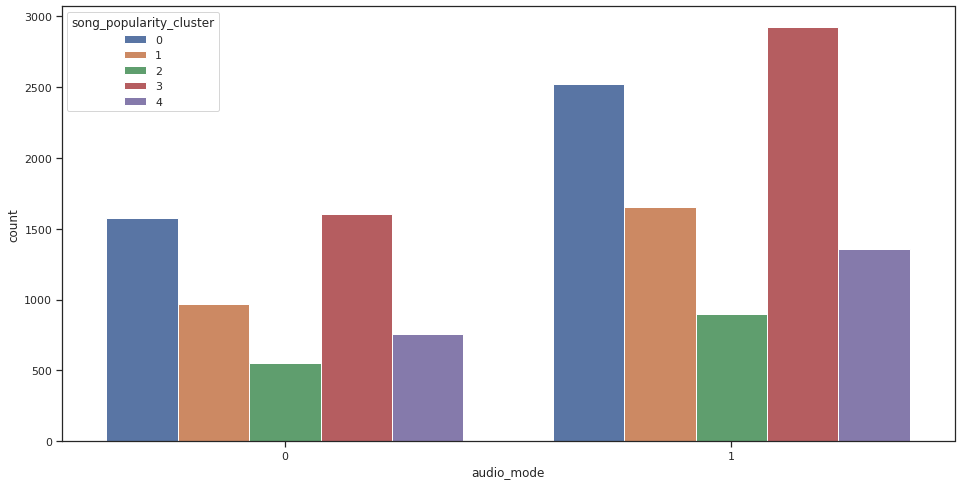

In [909]:
plt.figure(figsize=(16,8))
sns.countplot(x='audio_mode', data=df, hue='song_popularity_cluster')

Novamente parece que não há uma relação direta, entretanto é possível perceber que há mais músicas que preferem o modo Maior.

# Conclusão

Com base com os dados que temos não é possível perceber uma relação muito bem definida sobre as nossas variáveis, parece que estes detalhes técnicos não importam muito para definir se uma música vai ser ou não popular.

In [911]:
df[df['song_popularity'] >= 95]

,song_popularity,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,song_popularity_cluster
song_name,,,,,,,,,,,,,
BEBE,95,217822.000,0.172,0.635,0.902,0.000,0.125,-3.559,1,0.109,102.063,0.286,1
Be Alright,96,196373.000,0.697,0.553,0.586,11.000,0.081,-6.319,1,0.036,126.684,0.443,1
Better,95,229412.000,0.098,0.442,0.585,0.000,0.140,-10.332,0,0.096,97.565,0.116,1
Better Now,95,231266.000,0.354,0.680,0.563,10.000,0.136,-5.843,1,0.045,145.028,0.374,1
Eastside (with Halsey & Khalid),98,173799.000,0.555,0.560,0.680,6.000,0.116,-7.648,0,0.321,89.391,0.319,1
FEFE (feat. Nicki Minaj & Murda Beatz),96,179404.000,0.088,0.931,0.387,1.000,0.136,-9.127,1,0.031,125.978,0.376,1
Falling Down,97,196400.000,0.018,0.669,0.574,4.000,0.146,-6.442,0,0.029,120.013,0.273,1
Happier,100,214289.000,0.191,0.687,0.792,5.000,0.167,-2.749,1,0.045,100.015,0.671,1
I Like It,95,253390.000,0.099,0.816,0.726,5.000,0.372,-3.998,0,0.129,136.048,0.650,1


Essa parte do dataset mostra músicas com uma popularidade igual ou maior que 95, o que seriam excelentes neste quesito. Dando uma olhada podemos pensar em fatores que talvez sejam mais impactantes nessa análise, por exemplo: Estilo da música, cantor, pública alvo, idade média das pessoas que ouvem tal música, entre outros, mas aqui estamos entrando um pouco em especulação minha.

Talvez não seja em si os detalhes técnicos, mas um misto disso com também fatores muito mais subjetivos, como gosto musical da maioria ou influências artísticas daquela da população.

# Relações entre variáveis

Mesmo que uma possível conclusão já tenha sido feita, não custa nada ver relações entre as nossas variáveis e ver se descobrimos alguma coisa que pode ser interessante.

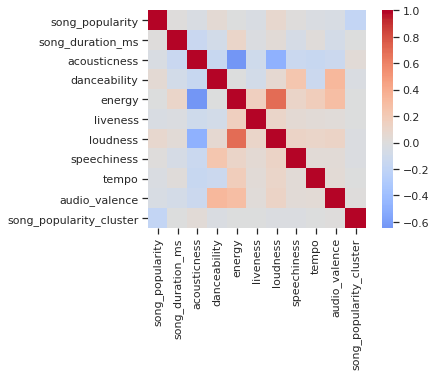

In [922]:
corr = df.corr()
sns.heatmap(corr, square=True, cmap="coolwarm", center=0)
plt.show()

Nossas variáveis não apresentam uma relação tão forte, porém podemos destacar a relação entre algumas delas:

*   Energia e sonoridade
*   Acústica e sonoridade
*   Acústica e energia

